In [1]:
# box plot
# teknik visualisasi menggunakan angka-angka statistik dalam bentuk box

# classification machine learning
# model machine learning yang memprediksi sebuah label
# label = sesuatu yang discrete (kalau continuous pakai regression)
# ini gambar kucing atau kelinci? 2 label: kucing, kelinci. data awal bentuk apa? kalau gambar berarti dia hitung fitur per pixel
# orang ini sakit jantung/ tidak? 2 label: sakit/ tidak
# ini bunga tipe apa? orchid, tulip, mawar = 3 label

In [11]:
# import package
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])


In [3]:
# import data
# kita akan ambil data dari https://www.kaggle.com/datasets/ghassen1302/property-prices-in-tunisia
df_tun = pd.read_csv("dataset/Tunisia.csv")
df_tun

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
...,...,...,...,...,...,...,...,...,...
12743,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,3200000.0,Tunis,Sidi Bou Said,6.505150
12744,Appartements,1.0,1.0,100.0,À Louer,600.0,Tunis,Autres villes,2.778151
12745,Maisons et Villas,3.0,1.0,760.0,À Vendre,1950000.0,Tunis,La Marsa,6.290035
12746,Maisons et Villas,3.0,1.0,190.0,À Vendre,240000.0,Tunis,La Marsa,5.380211


In [4]:
# data explorating
df_tun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category        12748 non-null  object 
 1   room_count      12748 non-null  float64
 2   bathroom_count  12748 non-null  float64
 3   size            12748 non-null  float64
 4   type            12748 non-null  object 
 5   price           12748 non-null  float64
 6   city            12748 non-null  object 
 7   region          12748 non-null  object 
 8   log_price       12748 non-null  float64
dtypes: float64(5), object(4)
memory usage: 896.5+ KB


In [5]:
# statistik
# bedroom -1 artinya belum ada bangunan, seperti tanah kosong
df_tun.describe()

,room_count,bathroom_count,size,price,log_price
count,12748.000000,12748.000000,12748.000000,1.274800e+04,12748.000000
mean,1.759649,0.759884,130.896219,1.601575e+07,4.374245
std,2.171468,1.264812,184.074990,1.016644e+09,1.389788
min,-1.000000,-1.000000,-1.000000,1.000000e+01,1.000000
25%,-1.000000,-1.000000,-1.000000,8.500000e+02,2.929419
50%,2.000000,1.000000,95.000000,8.975000e+04,4.953033
75%,3.000000,1.000000,150.000000,2.600000e+05,5.414973
max,20.000000,10.000000,2000.000000,1.000000e+11,11.000000


In [7]:
# tipe property nya apa saja?
df_tun["category"].value_counts()

Appartements                                 4700
Terrains et Fermes                           3415
Maisons et Villas                            3158
Magasins, Commerces et Locaux industriels     651
Bureaux et Plateaux                           461
Locations de vacances                         298
Colocations                                    65
Name: category, dtype: int64

<AxesSubplot:ylabel='price'>

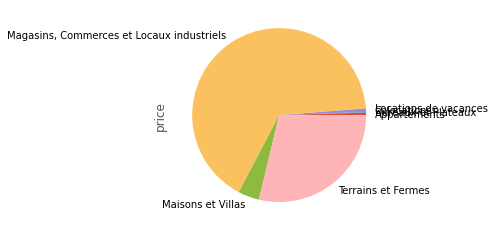

In [12]:
# box plot
# bandingin harga per category property
df_tun.groupby("category")["price"].mean().plot(kind="pie")

In [13]:
# pie chart tidak terlalu menjelaskan penyebaran data per category propery
# dia hanya kasih lihat kalau rata2 harga tanah industry paling mahal, kemudian tanah kosong, kemudian villa

In [20]:
# kita gunakan box plot untuk bisa melihat data2 seperti itu
list_category = list(df_tun["category"].value_counts().keys())
list_category

['Appartements',
 'Terrains et Fermes',
 'Maisons et Villas',
 'Magasins, Commerces et Locaux industriels',
 'Bureaux et Plateaux',
 'Locations de vacances',
 'Colocations']

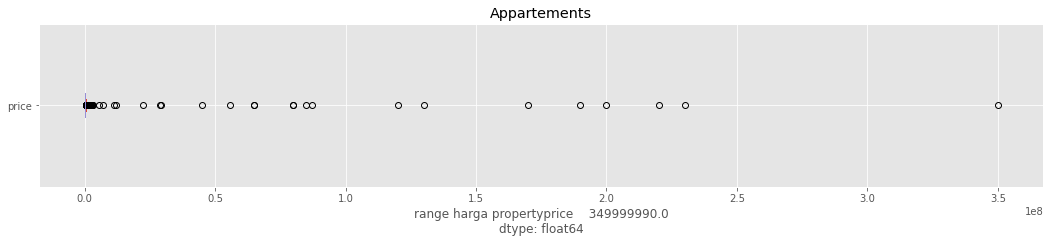

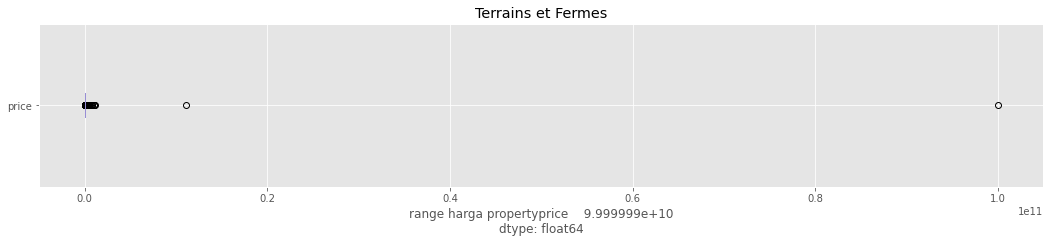

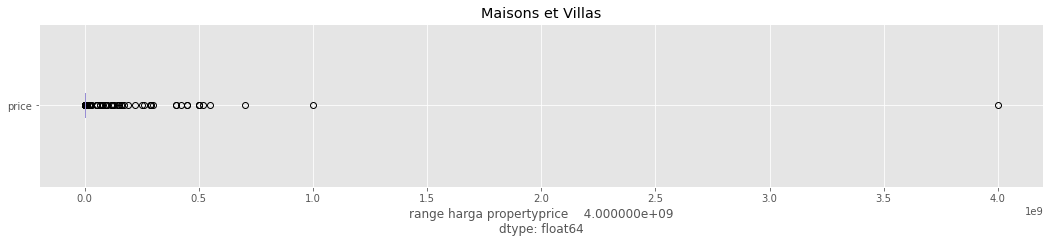

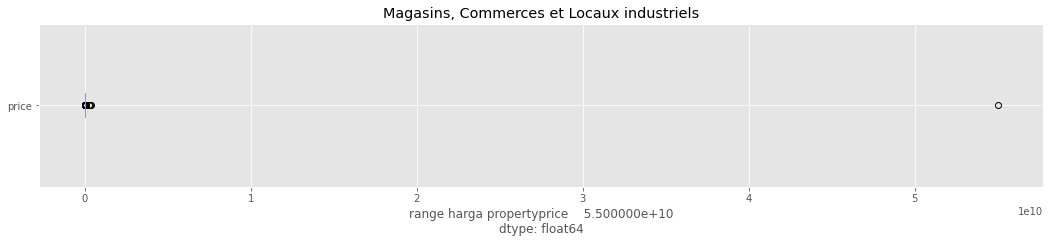

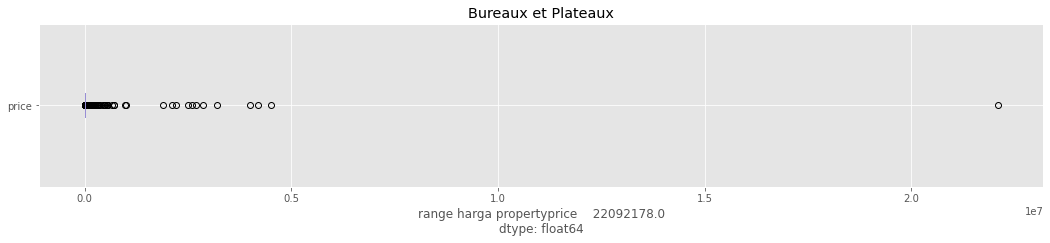

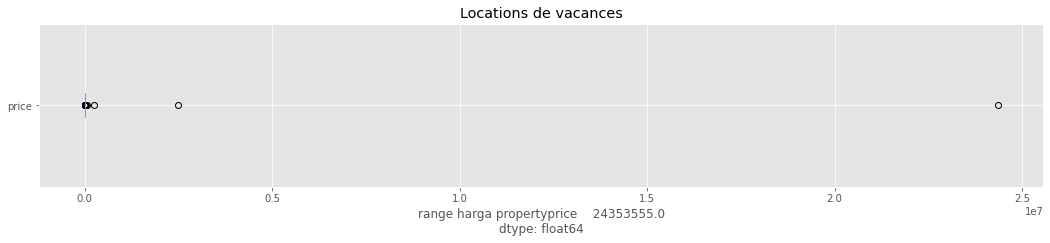

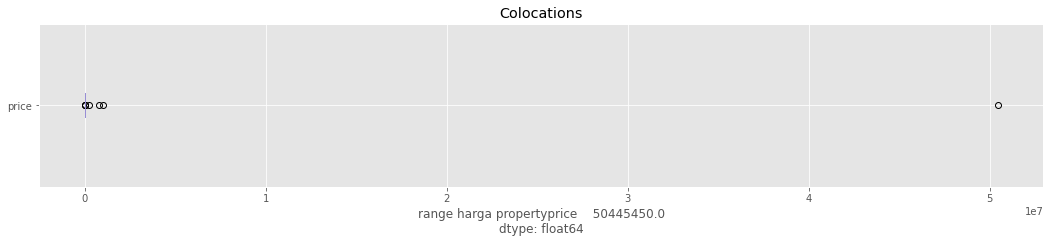

In [46]:
# untuk setiap category, kita pisahkan
for cat in list_category:
    df_cat = df_tun[(df_tun["category"] == cat)]
    df_cat[["price"]].plot(kind="box", vert=False, figsize=(18,3))
    plt.title(cat)
    plt.xlabel("range harga property" + str(df_cat[["price"]].max() - df_cat[["price"]].min()))

In [30]:
# data ini karena punya outlier yang angka tinggi sekali, saat mau lihat boxplot jadi tidak terlihat
# terlalu kecil box nya

# kita bisa data cleaning dulu, untuk mengeluarkan data2 outlier nya biar keliatan penyebaran data di box plot

# untuk contoh kali ini, kita gunakan dataset berbeda dulu

In [33]:
# import data
# data imigrasi Canada
df_can = pd.read_excel("dataset/Canada.xlsx",
                        sheet_name= "Canada by Citizenship",
                        skiprows=20,
                        skipfooter=2)
df_can

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [34]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [36]:
# simpan kolom OdName "Country" saja sebagai index, sisanya data jumlah imigran per tahun
df_can = df_can.drop(columns=[ 'Type', 'Coverage',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName'])

df_can = df_can.rename(columns={"OdName":"Country"})

df_can = df_can.set_index("Country")

df_can

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Yemen,1,2,1,6,0,18,7,12,7,18,...,124,161,140,122,133,128,211,160,174,217


In [37]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1980    195 non-null    int64
 1   1981    195 non-null    int64
 2   1982    195 non-null    int64
 3   1983    195 non-null    int64
 4   1984    195 non-null    int64
 5   1985    195 non-null    int64
 6   1986    195 non-null    int64
 7   1987    195 non-null    int64
 8   1988    195 non-null    int64
 9   1989    195 non-null    int64
 10  1990    195 non-null    int64
 11  1991    195 non-null    int64
 12  1992    195 non-null    int64
 13  1993    195 non-null    int64
 14  1994    195 non-null    int64
 15  1995    195 non-null    int64
 16  1996    195 non-null    int64
 17  1997    195 non-null    int64
 18  1998    195 non-null    int64
 19  1999    195 non-null    int64
 20  2000    195 non-null    int64
 21  2001    195 non-null    int64
 22  2002    195 non-null    int64
 23  2003 

In [39]:
# misalnya kita mau lihat berapa jumlah imigran Indonesia dan Singapore
# kita bisa bandingkan rata2nya saja
df_insg = df_can.loc[["Indonesia", "Singapore"]]
df_insg

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Indonesia,186,178,252,115,123,100,127,213,270,260,...,552,632,613,657,661,504,712,390,395,387
Singapore,241,301,337,169,128,139,205,372,808,1269,...,311,392,298,690,734,366,805,219,146,141


In [41]:
df_insg.mean(axis=1)

Country
Indonesia    386.764706
Singapore    428.794118
dtype: float64

<AxesSubplot:>

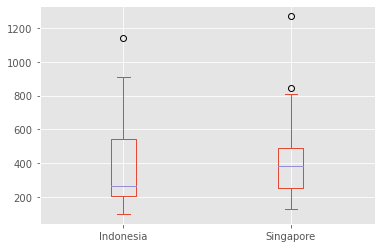

In [43]:
# kalau pakai box plot kita bisa bandingin penyebarannya juga
df_insg.T.plot(kind="box")

In [44]:
df_insg.T.describe()

Country,Indonesia,Singapore
count,34.000000,34.000000
mean,386.764706,428.794118
std,251.233449,250.619086
min,100.000000,128.000000
25%,207.000000,252.500000
50%,266.000000,383.000000
75%,545.250000,487.500000
max,1138.000000,1269.000000


In [47]:
# jumlah imigran yang dikirim Singapore lebih konsisten dan biasanya lebih banyak daripada imigran Indonesia

In [ ]:
# Classification
# di file sebelah